<a href="https://colab.research.google.com/github/annglee/Software-Enginering-/blob/main/PhaseThree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Exam Score Prediction (Regression Models)
This notebook trains and evaluates multiple regression models on student performance data.

In [ ]:
# Step 1: Install Required Libraries
!pip install xgboost scikit-learn --quiet

In [ ]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [ ]:
# Step 3: Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving CleanedStudentPerformanceFactors.csv to CleanedStudentPerformanceFactors.csv


,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,...,Teacher_Quality_Medium,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near
0,0.588235,0.600,0.0,0.500000,0.46,1.0,0.0,1.0,0.500000,0.0,...,True,False,False,True,False,True,False,False,False,True
1,0.470588,0.100,0.0,0.666667,0.18,1.0,0.4,1.0,0.666667,0.0,...,True,True,False,False,True,False,False,False,True,False
2,0.617647,0.950,1.0,0.500000,0.82,1.0,0.4,1.0,0.666667,0.0,...,True,False,True,False,False,False,True,False,False,True
3,0.764706,0.725,1.0,0.666667,0.96,1.0,0.2,1.0,0.666667,0.0,...,True,True,False,False,False,True,False,False,True,False
4,0.470588,0.800,1.0,0.333333,0.30,1.0,0.6,1.0,0.666667,0.0,...,False,False,True,False,True,False,False,False,False,True


In [ ]:
# Step 4: EDA and Preprocessing
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6506 entries, 0 to 6505
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hours_Studied                          6506 non-null   float64
 1   Attendance                             6506 non-null   float64
 2   Extracurricular_Activities             6506 non-null   float64
 3   Sleep_Hours                            6506 non-null   float64
 4   Previous_Scores                        6506 non-null   float64
 5   Internet_Access                        6506 non-null   float64
 6   Tutoring_Sessions                      6506 non-null   float64
 7   School_Type                            6506 non-null   float64
 8   Physical_Activity                      6506 non-null   float64
 9   Learning_Disabilities                  6506 non-null   float64
 10  Gender                                 6506 non-null   float64
 11  Exam

In [ ]:
# Step 5: Train Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVR': SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2 Score': r2_score(y_test, y_pred)
    }

In [ ]:
# Step 6: Show Results
results_df = pd.DataFrame(results).T
results_df.sort_values(by='RMSE', ascending=True)

,MSE,RMSE,MAE,R2 Score
Linear Regression,0.000215,0.014650,0.012214,0.990087
XGBoost,0.001101,0.033178,0.026329,0.949154
Random Forest,0.002466,0.049654,0.038835,0.886119
SVR,0.002563,0.050622,0.039565,0.881638
Decision Tree,0.007269,0.085261,0.064761,0.664225


In [ ]:
# Step 7: Save All Models
os.makedirs("models", exist_ok=True)
for name, model in models.items():
    filename = f"models/{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, filename)
    print(f"Saved: {filename}")

# Zip all models into one file
import shutil
shutil.make_archive("trained_models", 'zip', "models")

# Download
files.download("trained_models.zip")

Saved: models/linear_regression_model.pkl
Saved: models/decision_tree_model.pkl
Saved: models/random_forest_model.pkl
Saved: models/xgboost_model.pkl
Saved: models/svr_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Plots**

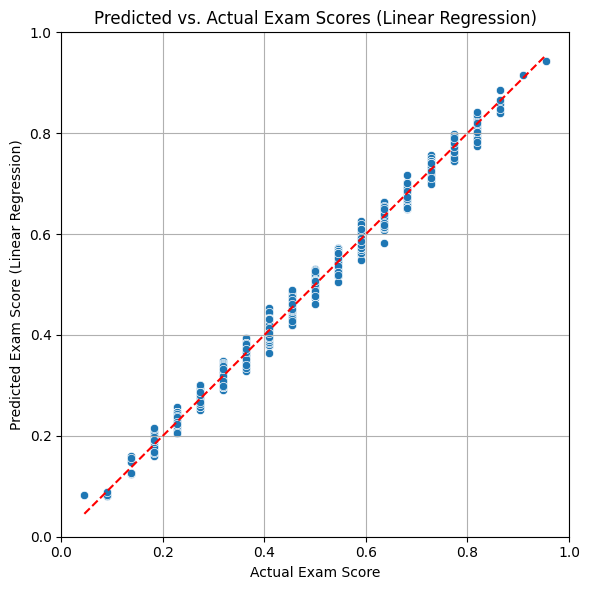

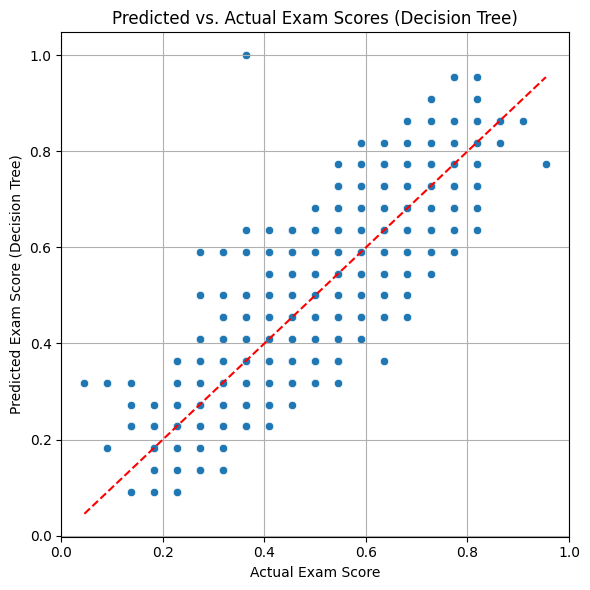

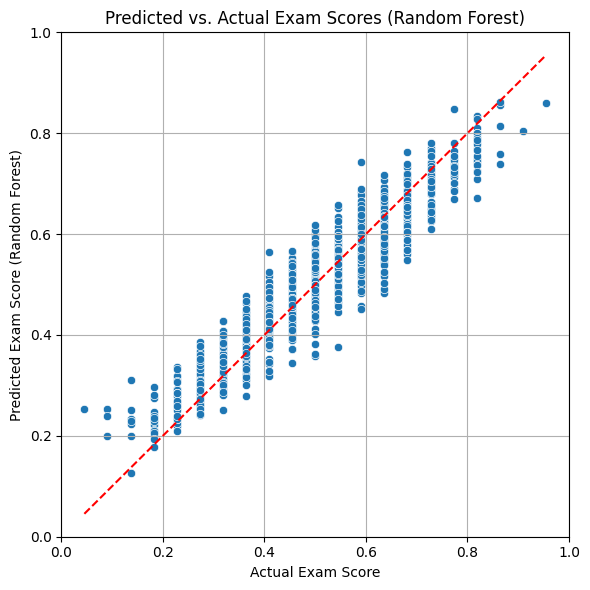

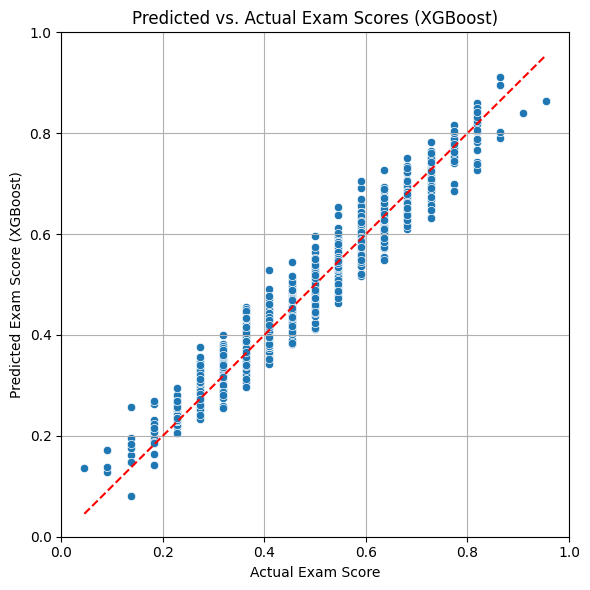

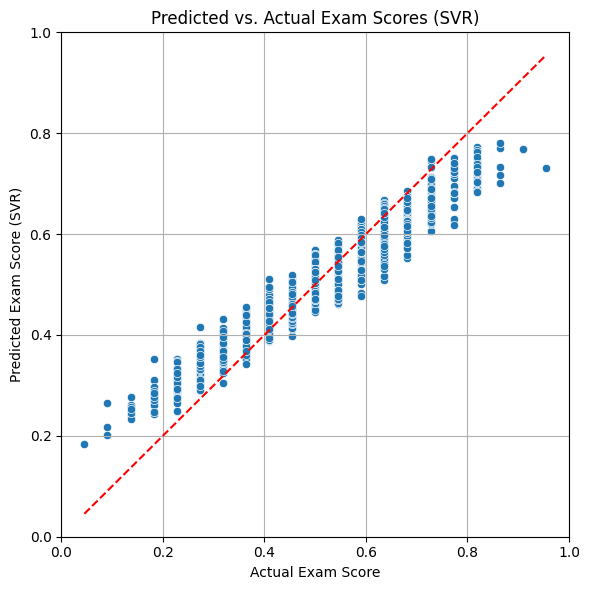

In [ ]:
# Predicted vs. Actual

import matplotlib.pyplot as plt
import seaborn as sns

for name, model in models.items():
    y_pred = model.predict(X_test)  # Get predictions for the current model

    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Exam Score')
    plt.ylabel(f'Predicted Exam Score ({name})')  # Update y-axis label with model name
    plt.title(f'Predicted vs. Actual Exam Scores ({name})')  # Update title with model name
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("\n")

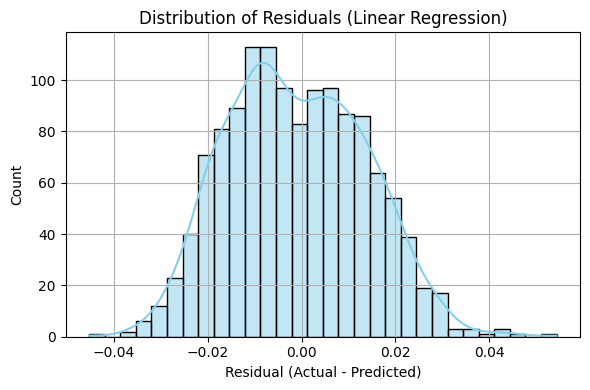

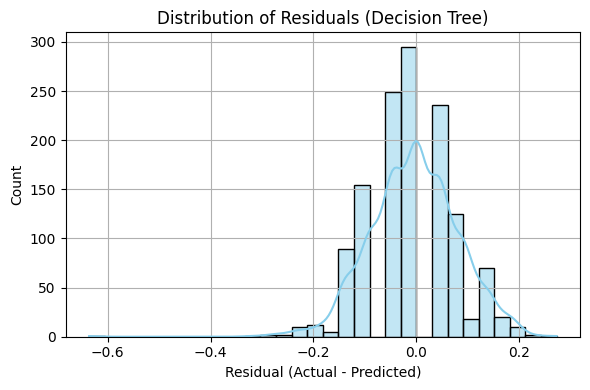

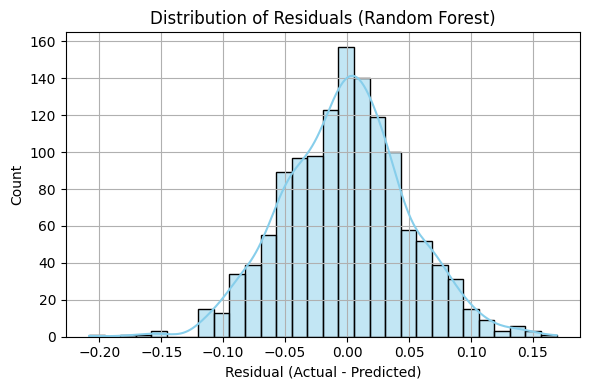

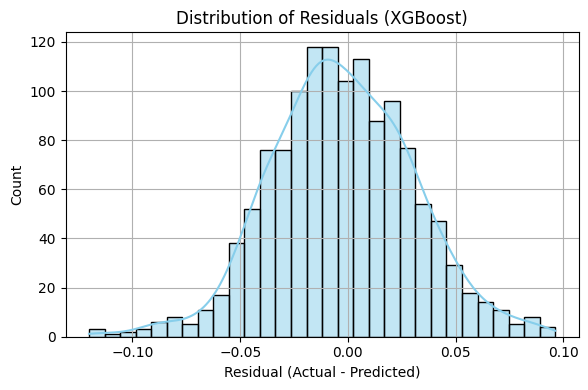

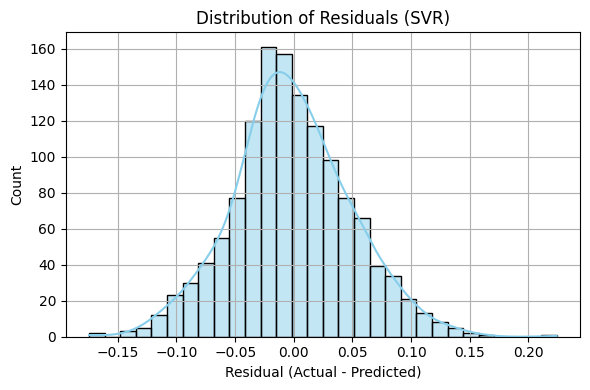

In [ ]:
# Residuals

import matplotlib.pyplot as plt
import seaborn as sns

for name, model in models.items():
    y_pred = model.predict(X_test)  # Get predictions for the current model
    residuals = y_test - y_pred  # Calculate residuals

    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, bins=30, kde=True, color='skyblue')
    plt.xlabel('Residual (Actual - Predicted)')
    plt.title(f'Distribution of Residuals ({name})')  # Update title with model name
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("\n") # Add spacing between plots

<ipython-input-10-739ae93c736c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='AbsCoefficient', y='Feature', palette='viridis')


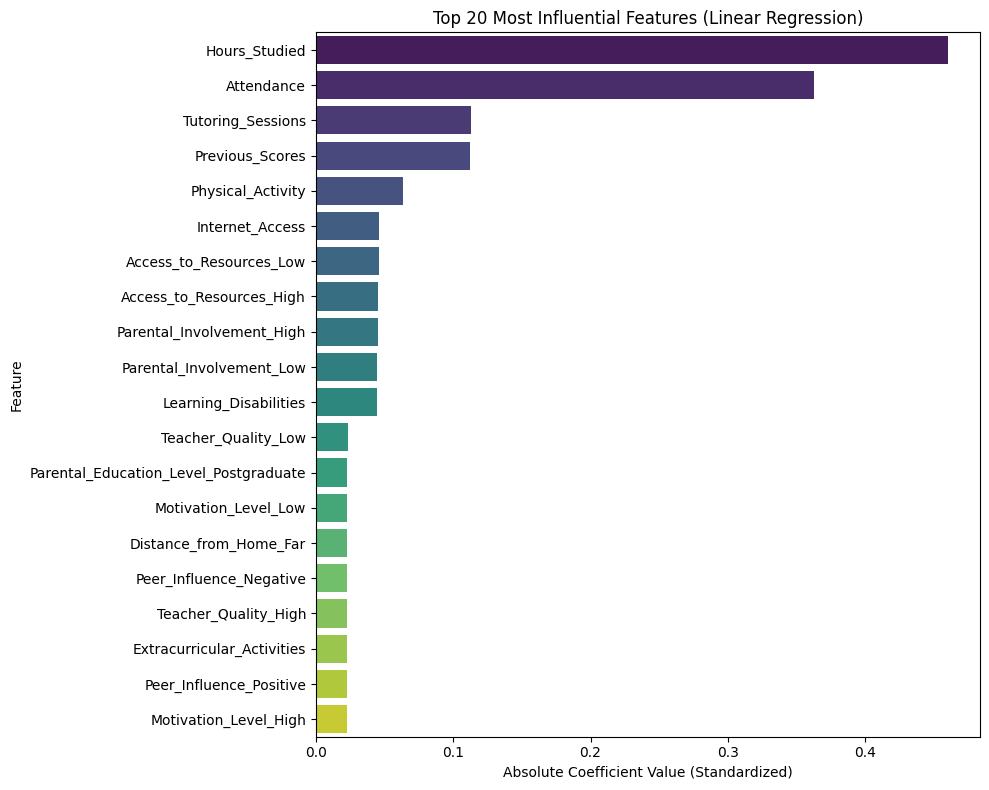

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas if not already imported

# Assuming 'models' is a dictionary containing your trained models
# Get the coefficients from the Linear Regression model
linear_model = models['Linear Regression']
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': linear_model.coef_})

# Create a copy and add absolute coefficient values
top_features = coefficients.copy()
top_features['AbsCoefficient'] = top_features['Coefficient'].abs()

# Sort by absolute coefficient and get top 20
top_features = top_features.sort_values(by='AbsCoefficient', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=top_features, x='AbsCoefficient', y='Feature', palette='viridis')
plt.title('Top 20 Most Influential Features (Linear Regression)')
plt.xlabel('Absolute Coefficient Value (Standardized)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

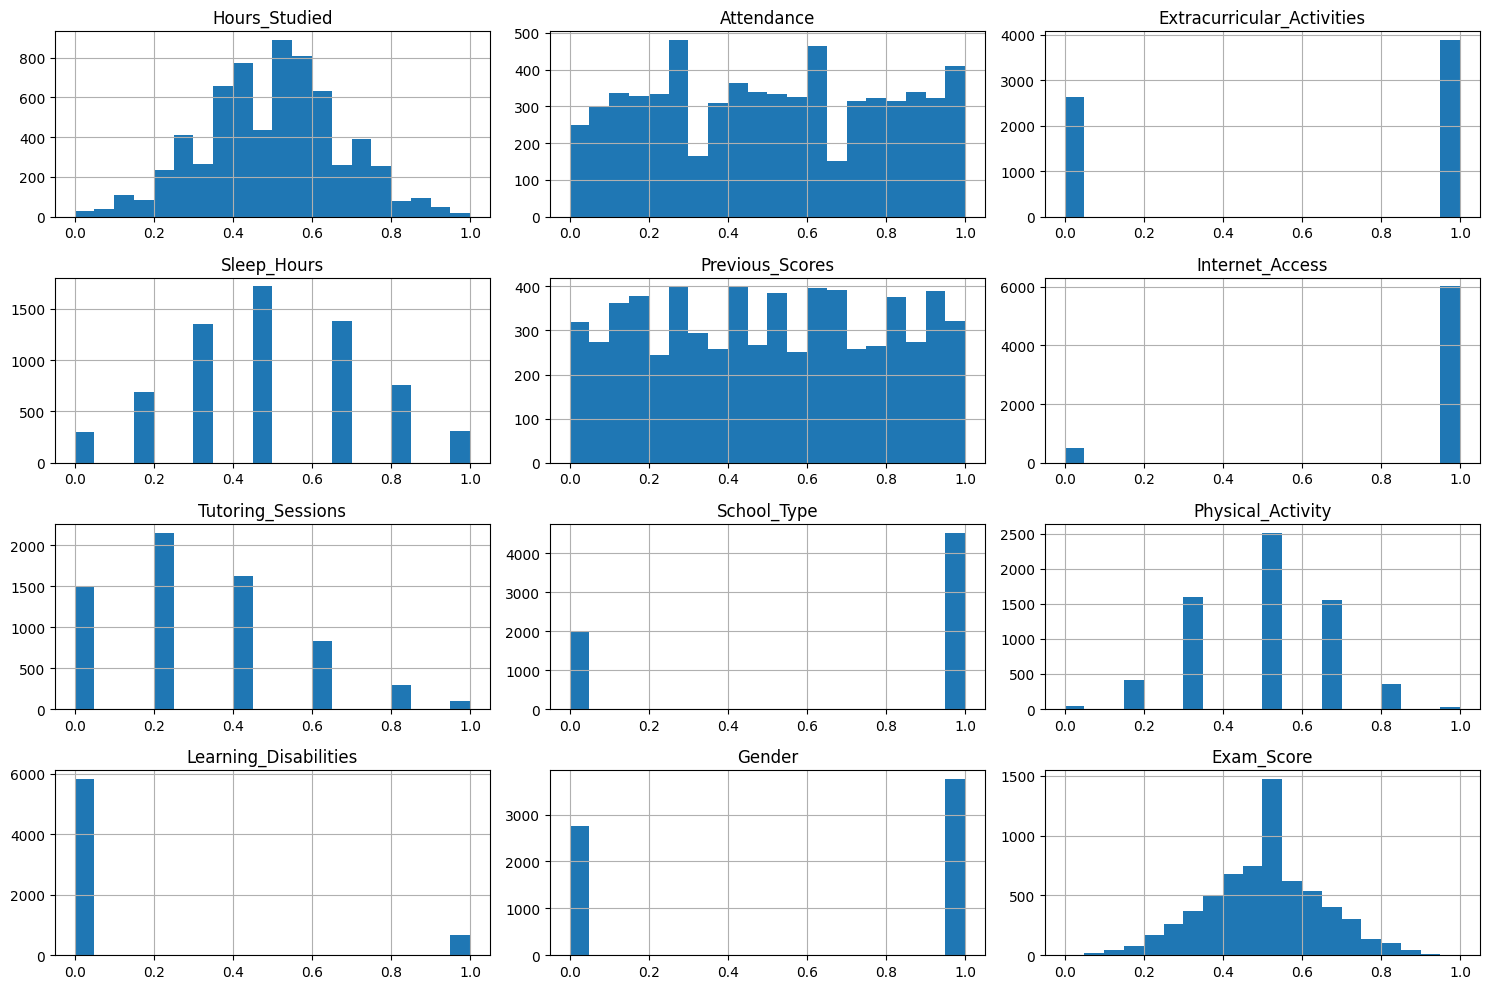

In [ ]:
# Distribution of each numerical feature
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

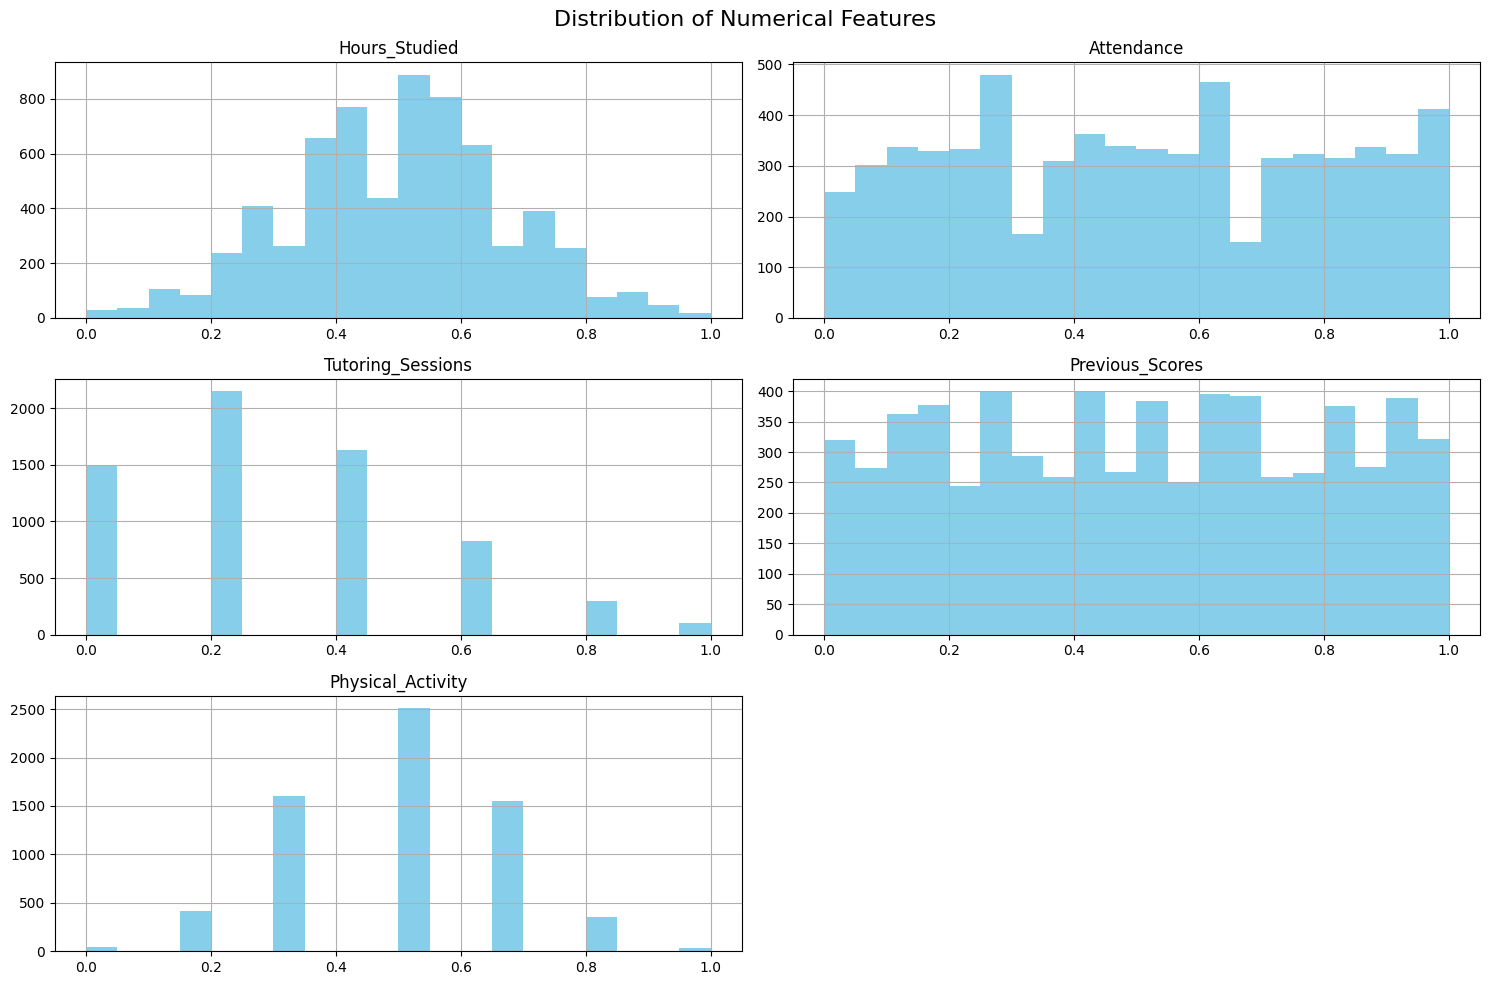

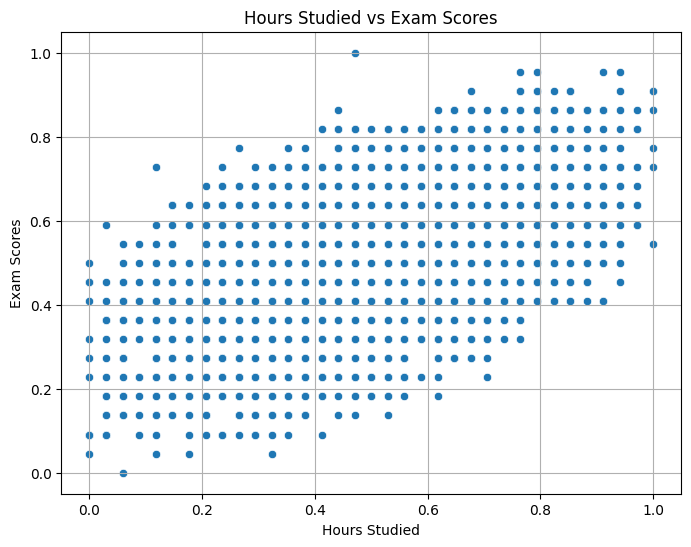

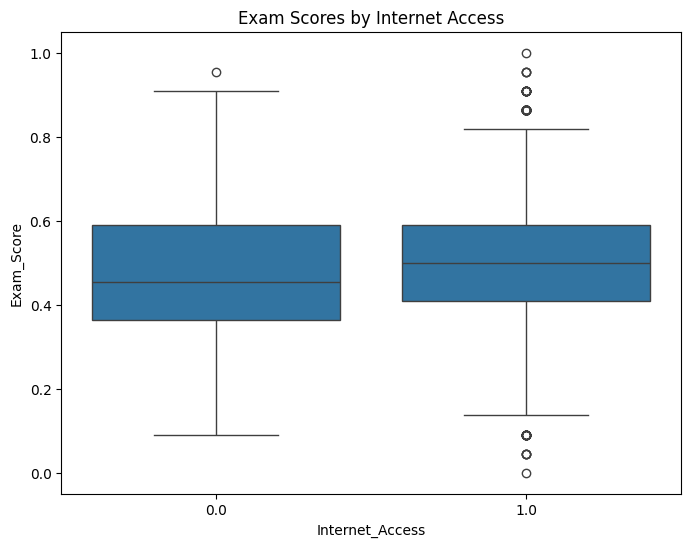

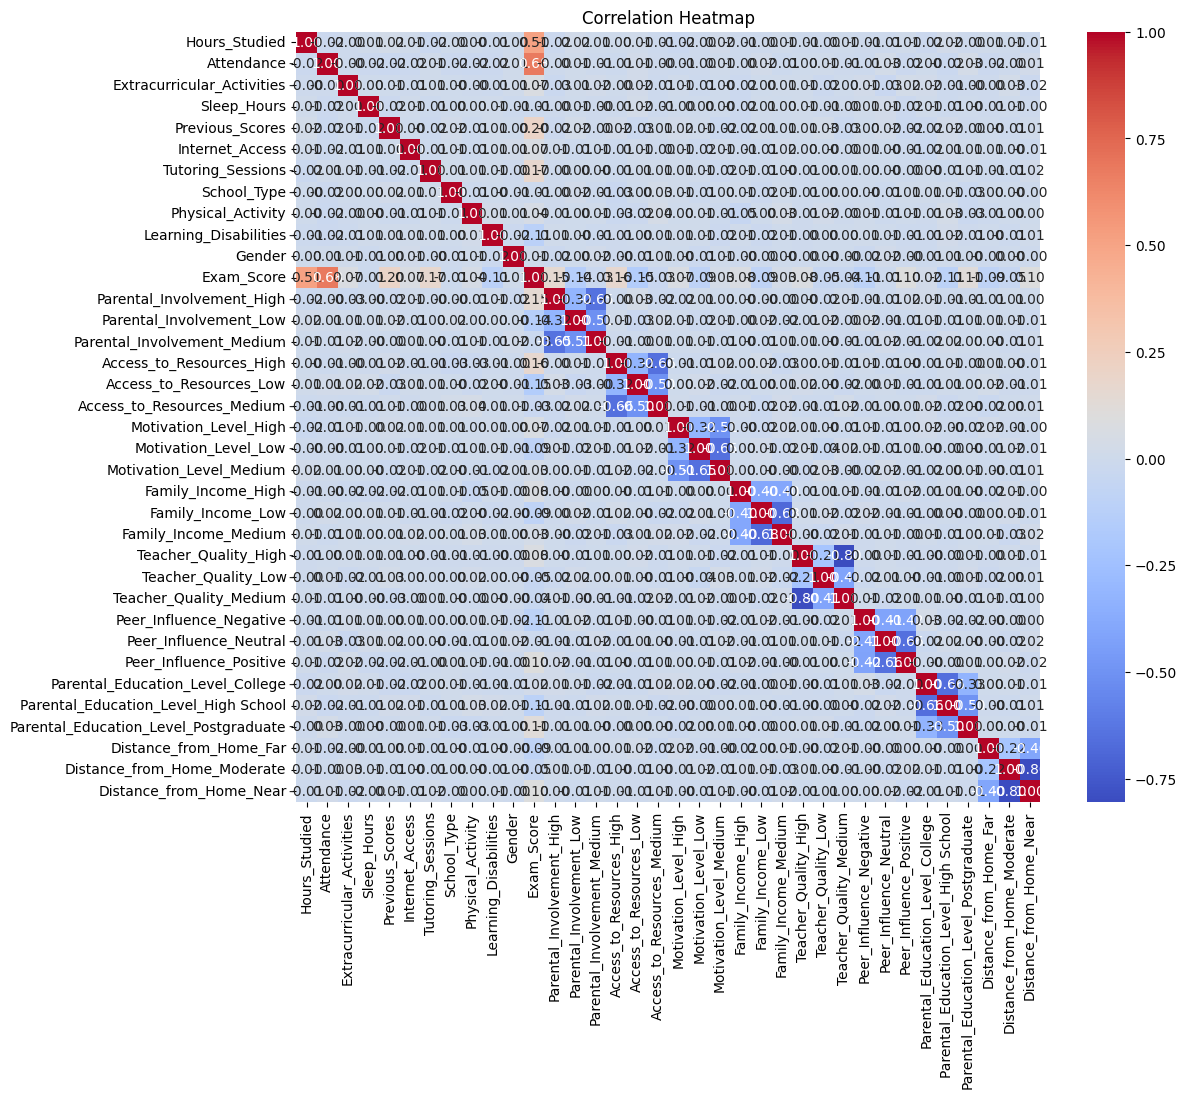

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Histograms for numerical features
numerical_features = ['Hours_Studied', 'Attendance', 'Tutoring_Sessions', 'Previous_Scores', 'Physical_Activity']
df[numerical_features].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Scatter plot: Hours Studied vs. Exam Scores
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score')
plt.title('Hours Studied vs Exam Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.grid(True)
plt.show()

# Boxplot: Exam Scores by Internet Access
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Internet_Access', y='Exam_Score')
plt.title('Exam Scores by Internet Access')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
